<a href="https://colab.research.google.com/github/rodrigoclira/mineracao-dados/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação

## Pré-Processamento

In [ ]:
!pip install xlrd==1.2.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.experimental import (
    enable_iterative_imputer,
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

In [ ]:
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()

    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

In [ ]:
url = "https://github.com/rodrigoclira/mineracao-dados/blob/main/datasets/titanic3.xls?raw=true"
df = pd.read_excel(url)


ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

df_preprocessed = pd.concat([X, y])

In [ ]:
y

#Regressão Logística

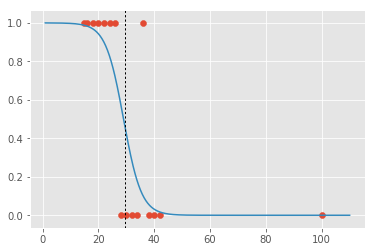


A regressão logística estima probabilidades usando uma função logística.
(Tome cuidado: apesar de ter regressão no nome, ela é usada para
classificação.) Esse tem sido o modelo de classificação padrão para a maioria
das ciências.
A seguir, apresentamos algumas das características que incluiremos em cada
modelo:

## Eficiência na execução
Pode usar n_jobs se não estiver usando o solucionador 'liblinear'.

##Pré-processamento dos dados
Se solver estiver definido com 'sag' ou 'saga', padronize para que a
convergência funcione. É capaz de lidar com entradas esparsas.

##Para evitar uma superadequação
O parâmetro C controla a regularização. (Valores menores de C significam
mais regularização, enquanto valores maiores significam menos.) É
possível especificar penalty com 'l1' ou 'l2' (o default).

##Interpretação dos resultados
O atributo .coef do modelo após a adequação mostra os coeficientes da
função de decisão. Uma mudança de x em uma unidade modifica o log odds
ratio (logaritmo da razão de chances) de acordo com o coeficiente. O
atributo .intercept_ é o inverso dos log odds da condição de base.

In [ ]:
from sklearn.linear_model import (
    LogisticRegression,
)

In [ ]:
lr = LogisticRegression(random_state=42)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
lr.predict(X.iloc[[0]])

In [ ]:
lr.predict_proba(X.iloc[[0]])

https://matheusfacure.github.io/2017/02/25/regr-log/

# Naive Bayes



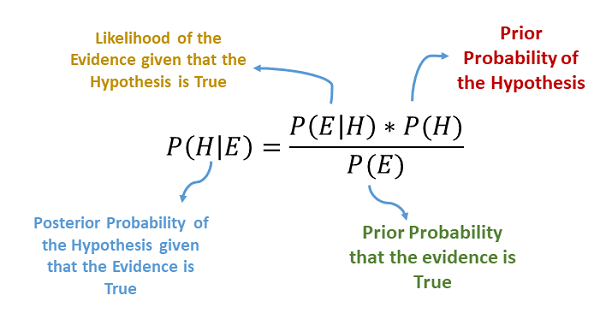


O Naive Bayes é um classificador probabilístico que pressupõe uma
independência entre os atributos dos dados. É popular para aplicações de
classificação de textos, por exemplo, para identificação de spams. Uma
vantagem desse modelo é que, por supor uma independência entre os
atributos, ele é capaz de fazer o treinamento de um modelo com um número
pequeno de amostras. (Uma desvantagem é que o modelo não conseguirá
capturar as interações entre os atributos.) Esse modelo simples também pode
trabalhar com dados que tenham vários atributos. Desse modo, serve como
um bom modelo de base.

Há três classes no sklearn: GaussianNB , MultinomialNB e BernoulliNB . A primeira supõe uma distribuição gaussiana (atributos contínuos com uma distribuição normal), a segunda é para contadores de ocorrência discretos, e a terceira, para atributos booleanos discreto

Esse modelo tem as seguintes propriedades:

## Eficiência na execução
Treinamento O(Nd), em que N é o número de exemplos para treinamento, e
d é a dimensionalidade. Testes O(cd), em que c é o número de classes.

##Pré-processamento dos dados
É pressuposto que os dados são independentes. O desempenho deverá ser
melhor após a remoção de colunas colineares. Para dados numéricos
contínuos, talvez seja uma boa ideia separar os dados em bins. A classe
gaussiana implica uma distribuição normal, e pode ser necessário ter de
transformar os dados a fim de convertê-los em uma distribuição desse tipo.

##Para evitar uma superadequação
Exibe alto bias e baixa variância (os emsembles não reduzirão a variância).

##Interpretação dos resultados
A porcentagem é a probabilidade de uma amostra pertencer a uma classe
com base em priors (conhecimento prévio).


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
nb.score(X_test, y_test)

In [ ]:
nb.predict(X.iloc[[0]])

In [ ]:
nb.predict_proba(X.iloc[[0]])

Esses modelos são suscetíveis ao problema da probabilidade zero. Se você tentar
classificar uma nova amostra que não tenha dados de treinamento, ela terá
uma probabilidade zero. Uma solução é usar a suavização de Laplace (Laplace
smoothing).

https://ichi.pro/pt/algoritmo-naive-bayes-101099747947170

#SVM (Support Vector Machine)


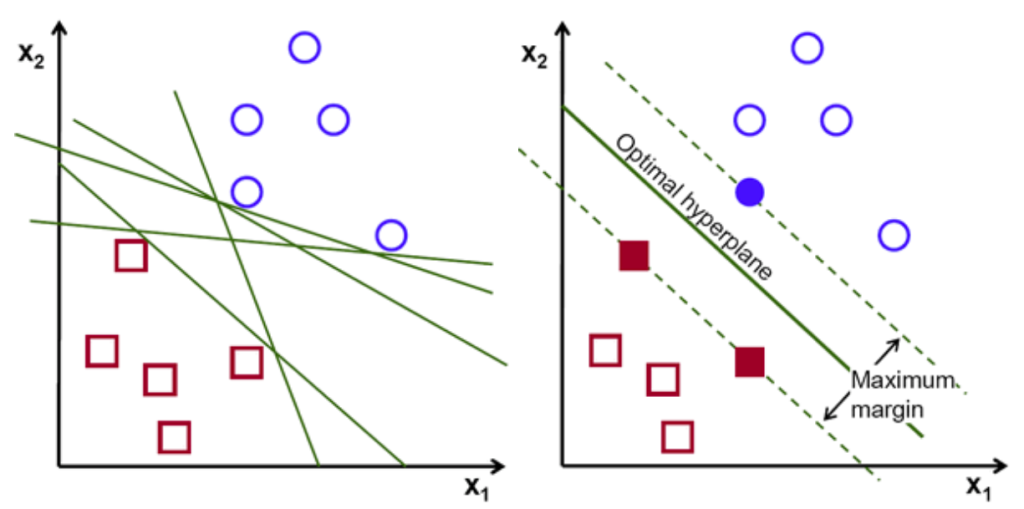

Uma SVM (Support Vector Machine, ou Máquina de Vetores Suporte) é um
algoritmo que tenta fazer a adequação de uma linha (ou plano ou hiperplano)
entre as diferentes classes de modo a maximizar a distância da linha até os
pontos das classes. Dessa maneira, ela tenta encontrar uma separação robusta
entre as classes. Os vetores suporte (support vectors) são os pontos da
fronteira do hiperplano divisor

Em geral, a SVM tem um bom desempenho e oferece suporte para espaços
lineares e não lineares usando um truque de kernel (kernel trick). O truque de
kernel é a ideia de que podemos criar uma fronteira de decisão em uma nova
dimensão minimizando uma fórmula que seja mais fácil de calcular, em
comparação a realmente mapear os pontos para a nova dimensão. O kernel default é o Radial Basis Function, ou Função de Base Radial ('rbf'), controlado
pelo padrão gamma, o qual é capaz de mapear um espaço de entrada em um
espaço com mais dimensões.
As SVMs têm as seguintes propriedades:

## Eficiência na execução
A implementação do scikit-learn é O(n^4), portanto pode ser difícil escalar
para tamanhos maiores. Usar um kernel linear ou o modelo LinearSVC pode 

melhorar o desempenho da execução, talvez à custa da precisão. Aumentar o valor do parâmetro cache_size pode reduzir a ordem para O(n^3).

## Pré-processamento dos dados
O algoritmo não é invariante à escala. Padronizar os dados é extremamente
recomendável.

## Para evitar uma superadequação
O parâmetro C (parâmetro de penalidade) controla a regularização. Um
valor menor permite ter uma margem menor no hiperplano. Um valor maior
para gamma tenderá a uma superadequação nos dados de treinamento. O
modelo LinearSVC aceita parâmetros loss e penalty para regularização.

## Interpretação dos resultados
Inspecione .support_vectors_, embora possam ser difíceis de explicar. Com
kernels lineares, você poderá inspecionar .coef_.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=42, probability=True)

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
svc.score(X_test, y_test)

In [ ]:
svc.predict(X.iloc[[0]])

In [ ]:
svc.predict_proba(X.iloc[[0]])

https://alvarezsolucoesdigitais.com/aprendizado-de-maquina/maquinas-de-vetores-de-suportes-svm-introducao-aos-algoritmos-de-aprendizado-de-maquina/

https://www.analyticsvidhya.com/blog/2021/05/multiclass-classification-using-svm/


#KNN

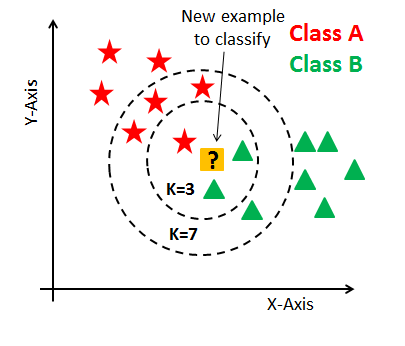

O algoritmo KNN (K-Nearest Neighbor, ou K Vizinhos Mais Próximos) faz a
classificação com base na distância até algumas amostras (k) de treinamento.
A família de algoritmos é chamada de aprendizado baseado em instâncias
(instance-based learning), pois não há parâmetros para aprender. O modelo
pressupõe que a distância é suficiente para fazer uma inferência; afora isso,
nenhuma pressuposição é feita sobre os dados subjacentes ou suas
distribuições.

A parte complicada é selecionar o valor apropriado de k. Além disso, a
maldição da dimensionalidade pode atrapalhar as métricas de distância, pois
haverá pouca diferença entre os vizinhos mais próximos e mais distantes no
caso de mais dimensões.

Os modelos que usam vizinhos mais próximos têm as seguintes propriedades:

##Eficiência na execução
Treinamento O(1), mas precisa armazenar dados. Testes O(Nd), em que N é
o número de exemplos de treinamento e d é a dimensionalidade.

##Pré-processamento dos dados
Sim, cálculos baseados em distância têm melhor desempenho se houver
padronização.

##Para evitar uma superadequação
Eleve n_neighbors. Mude p para métrica L1 ou L2.

##Interpretação dos resultados
Interpreta os k vizinhos mais próximos para a amostra (usando o método
.kneighbors). Esses vizinhos (se você puder explicá-los) explicarão o seu
resultado.

In [ ]:
from sklearn.neighbors import (
    KNeighborsClassifier,
)

In [ ]:
knc = KNeighborsClassifier()

In [ ]:
knc.fit(X_train, y_train)

In [ ]:
knc.score(X_test, y_test)

In [ ]:
knc.predict(X.iloc[[0]])

In [ ]:
knc.predict_proba(X.iloc[[0]])

https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

# Árvore de decisão

Uma árvore de decisão é como ir a um médico que faz uma série de
perguntas a fim de determinar a causa de seus sintomas. Podemos usar um
processo para criar uma árvore de decisão e ter uma série de perguntas para
prever uma classe alvo. As vantagens desse modelo incluem suporte para
dados não numéricos (em algumas implementações), pouca preparação dos
dados (não há necessidade de escalar), suporte para lidar com
relacionamentos não lineares, a importância dos atributos é revelada e é fácil
de explicar.
O algoritmo padrão usado para a criação se chama CART (Classification And Regression Tree, Árvore de Classificação e Regressão). Ele usa a impureza
de Gini ou medida de índices para tomada de decisões. Isso é feito
percorrendo os atributos em um laço e encontrando o valor que forneça a
menor probabilidade de erro de classificação.

As árvores de decisão têm as seguintes propriedades:
##Eficiência na execução
Para a criação, percorre cada um dos m atributos e ordena todas as n
amostras, O(mn log n). Para predição, você percorrerá a árvore, O(altura).

##Pré-processamento dos dados
Não é necessário escalar. É preciso se livrar dos valores ausentes e
convertê-los em dados numéricos.

## Para evitar uma superadequação
Defina max_depth com um número menor e aumente min_impurity_decrease.

##Interpretação dos resultados
É possível percorrer a árvore de opções. Por haver passos, uma árvore é
ruim para lidar com relacionamentos lineares (uma pequena mudança em
um número pode levar a um caminho diferente). A árvore também é
extremamente dependente dos dados de treinamento. Uma pequena
mudança pode modificar a árvore toda.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(
    random_state=42, max_depth=3
)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)

In [ ]:
dt.predict(X.iloc[[0]])

In [ ]:
dt.predict_proba(X.iloc[[0]])

In [ ]:
dt.predict_log_proba(X.iloc[[0]])

Visualize a árvore com o código a seguir

In [ ]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
tree.export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)

In [ ]:
from IPython.display import Image
Image(g.create_png())

O pacote dtreeviz (https://github.com/parrt/dtreeviz) pode ajudar a
compreender como a árvore de decisão funciona. Ele cria uma árvore com
histogramas contendo rótulos, a qual possibilita insights valiosos

In [ ]:
!pip install dtreeviz

Importância dos atributos mostrando a importância de Gini (redução de erro
usando esse atributo):

In [ ]:
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda x: x[1],
    reverse=True,)[:5]:
    print(f"{col:10}{val:10.3f}")

Podemos usar também o Yellowbrick para visualizar a importância dos
atributos

In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.model_selection import (
    FeatureImportances,
)

fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(dt)
fi_viz.fit(X, y)
fi_viz.poof()

# Random Forest

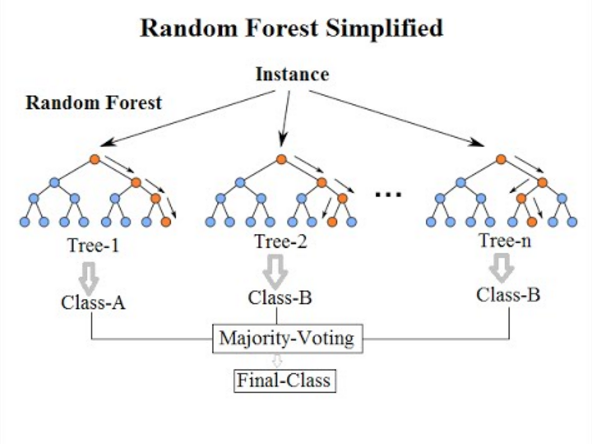

Uma floresta aleatória (random forest) é um conjunto de árvores de decisão.
Ela usa bagging para corrigir a tendência das árvores de decisão à
superadequação. Ao criar várias árvores treinadas com subamostras e
atributos aleatórios dos dados, a variância é reduzida.
Como o treinamento é feito em subamostras dos dados, as florestas aleatórias
são capazes de avaliar o erro OOB e o desempenho. Podem também exibir a
importância dos atributos, calculando a média da importância em todas as
árvores.
A intuição para compreender o bagging vem de um artigo de 1785 do
Marquês de Condorcet. Essencialmente, ele diz que, se você estiver criando
um júri, deve adicionar qualquer pessoa que tenha uma chance maior que
50% de dar um veredicto correto e então tirar a média das decisões. Sempre
que adicionar outro membro (e seu processo de seleção for independente dos
demais), um resultado melhor será obtido.
A ideia das florestas aleatórias é criar uma “floresta” de árvores de decisão
treinadas em diferentes colunas dos dados de treinamento. Se cada árvore
tiver uma chance melhor que 50% de fazer uma classificação correta, você
deverá incorporar a sua predição. A floresta aleatória tem sido uma excelente
ferramenta tanto para classificação como para regressão, embora,
recentemente, tenha cedido espaço para as árvores com gradient boosting.
Ela tem as seguintes propriedades:

##Eficiência na execução
Deve criar j árvores aleatórias. Isso pode ser feito em paralelo usando n_jobs.
A complexidade de cada árvore é de O(mn log n), em que n é o número de
amostras e m é o número de atributos. Para a criação, percorre cada um dos
m atributos em um laço e ordena todas as n amostras, O(mn log n). Para
predição, percorre a árvore, O(altura).

##Pré-processamento dos dados
Não é necessário.

##Para evitar uma superadequação
Adicione mais árvores (n_estimators). Use um valor menor para max_depth.

##Interpretação dos resultados
Tem suporte para importância de atributos, porém não há uma única árvore
de decisão para percorrer. É possível inspecionar árvores únicas do
conjunto.

In [ ]:
from sklearn.ensemble import (
    RandomForestClassifier,
)

In [ ]:
rf = RandomForestClassifier(random_state=42, min_samples_leaf=2, min_samples_split=2, max_depth = 5, n_estimators=50)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
rf.predict(X.iloc[[0]])

In [ ]:
rf.predict_proba(X.iloc[[0]])

In [ ]:
rf.predict_log_proba(X.iloc[[0]])

Importância dos atributos mostrando a importância de Gini (redução do erro
usando esse atributo):

In [ ]:
for col, val in sorted(
    zip(X.columns, rf.feature_importances_),
    key=lambda x: x[1],
    reverse=True,)[:5]:
    print(f"{col:10}{val:10.3f}")

https://www.ibm.com/cloud/learn/random-forest

#XGBoost

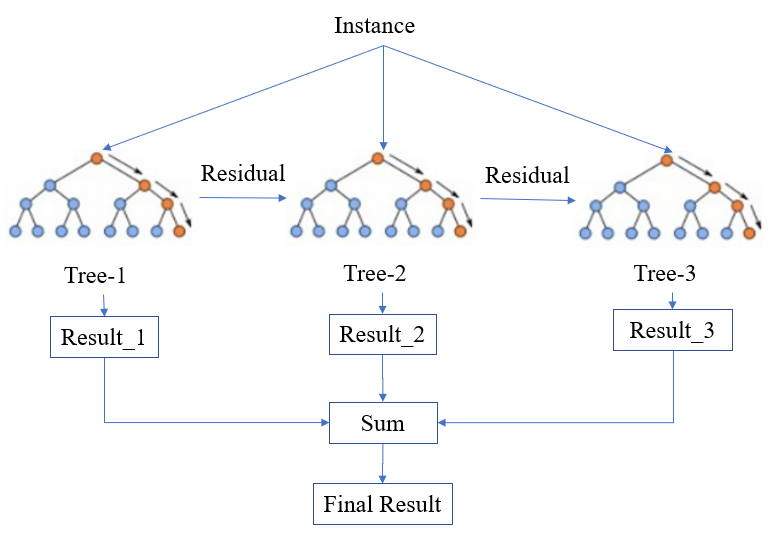

Embora o sklearn tenha um GradientBoostedClassifier, é melhor usar uma
implementação de terceiros que utilize o extreme boosting. Elas tendem a
fornecer melhores resultados.

O XGBoost (https://oreil.ly/WBo0g) é uma biblioteca popular, além do scikit-
learn. Ele cria uma árvore fraca e, então, “melhora” as árvores subsequentes

(faz um boosting) a fim de reduzir os erros residuais. O algoritmo tenta
capturar e tratar qualquer padrão nos erros, até que pareçam ser aleatórios.
O XGBoost tem as seguintes propriedades:

## Eficiência na execução
O XGBoost pode executar em paralelo. Utilize a opção n_jobs para informar
o número de CPUs. Use a GPU para ter um desempenho melhor ainda.

## Pré-processamento dos dados
Não é necessário escalar com modelos baseados em árvore. É preciso
codificar os dados de categoria.

## Para evitar uma superadequação
O parâmetro early_stopping_rounds=N pode ser definido para interromper o
treinamento caso não haja melhoras após N rodadas. As regularizações L1 e
L2 são controladas por reg_alpha e reg_lambda, respectivamente. Números
maiores são mais conservadores.

## Interpretação dos resultados
Inclui importância de atributos.

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_class = xgb.XGBClassifier(random_state=42, max_depth=6, n_estimators=50)

In [ ]:
xgb_class.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_set=[(X_test, y_test)],
)

In [ ]:
xgb_class.score(X_test, y_test)

In [ ]:
xgb_class.predict(X.iloc[[0]])

In [ ]:
xgb_class.predict_proba(X.iloc[[0]])

A importância dos atributos é o ganho médio em todos os nós em que o
atributo é usado:

In [ ]:
for col, val in sorted(
    zip(
        X.columns,
        xgb_class.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,)[:5]:
    print(f"{col:10}{val:10.3f}")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgb_class, ax=ax)
#fig.savefig("images/mlpr_1005.png", dpi=300)

https://www.datageeks.com.br/xgboost/

# PyCaret

https://pycaret.org/

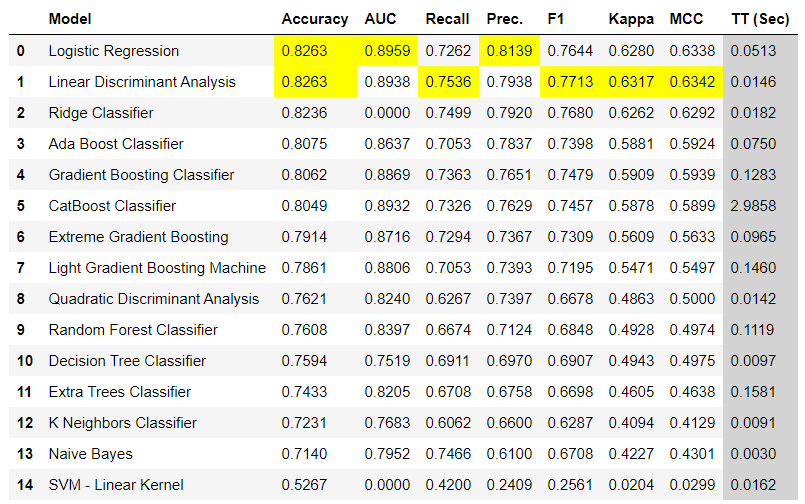

In [ ]:
!pip install pycaret
!pip install markupsafe==2.0.1
!pip install Jinja2


In [ ]:
# compare machine learning algorithms on the sonar classification dataset
from pandas import read_csv
from pycaret.classification import setup
from pycaret.classification import compare_models
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
# load the dataset
df = read_csv(url, header=None)
# set column names as the column number
n_cols = df.shape[1]
df.columns = [str(i) for i in range(n_cols)]
# setup the dataset
grid = setup(data=df, target=df.columns[-1], html=False, silent=True, verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)


https://machinelearningmastery.com/pycaret-for-machine-learning/